In [1]:
import pandas as pd
import numpy as np
import string
import spacy
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from nltk.corpus import stopwords
%matplotlib inline

In [4]:
data = pd.read_csv(r"F:\Data Science\Assignments\11. Text Mining\Elon_musk.csv", encoding= "ISO-8859-1")
data

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [7]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [8]:
data

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [10]:
data.shape

(1999, 1)

In [11]:
data.rename({'Text':'text'}, axis=1, inplace=True)

In [22]:
df = [text.strip() for text in data.text]  #remove both the leading and trailing spaces
df = [text for text in data.text] # removes empty strings, because they are considered as false in python
df

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [23]:
#joining the list into one string/text

df_text = ' '.join(df)
len(df_text)

158805

In [24]:
print(df_text[0:500])

@kunalb11 Im an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,
All thought he would fail,
Himself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! 


In [26]:
#Tokenization

from nltk.tokenize import word_tokenize
df_tokens = word_tokenize(df_text)

print(df_tokens)

['@', 'kunalb11', 'I\x92m', 'an', 'alien', '@', 'ID_AA_Carmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', '@', 'joerogan', '@', 'Spotify', 'Great', 'interview', '!', '@', 'gtera27', 'Doge', 'is', 'underestimated', '@', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https', ':', '//t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https', ':', '//t.co/zGxJFDzzrM', '@', 'OwenSparks_', '@', 'flcnhvy', '@', 'anonyx10', 'Haha', 'thanks', ':', ')', '@', 'flcnhvy', '@', 'anonyx10', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', '@', 'Gi

In [27]:
len(df_tokens)

28892

In [28]:
#Stopwords
import nltk
from nltk.corpus import stopwords

my_stopwords = stopwords.words('english')
my_stopwords.append('the')

In [30]:
no_stoptoken = [text for text in df_tokens if not text in my_stopwords]

print(no_stoptoken[0:400])

['@', 'kunalb11', 'I\x92m', 'alien', '@', 'ID_AA_Carmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'next-level', '.', 'Have', 'tried', '?', '@', 'joerogan', '@', 'Spotify', 'Great', 'interview', '!', '@', 'gtera27', 'Doge', 'underestimated', '@', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'next', 'even', '!', '!', 'Happy', 'New', 'Year', 'Ox', '!', 'https', ':', '//t.co/9WFKMYu2oj', 'Frodo', 'underdoge', ',', 'All', 'thought', 'would', 'fail', ',', 'Himself', '.', 'https', ':', '//t.co/zGxJFDzzrM', '@', 'OwenSparks_', '@', 'flcnhvy', '@', 'anonyx10', 'Haha', 'thanks', ':', ')', '@', 'flcnhvy', '@', 'anonyx10', 'Indeed', '!', 'Tweets', 'definitely', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'entertaining', 'outcome', 'likely', '@', 'GiveDirectly', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', '@', 'kanyewest', 'https', ':', '//t.co/3rWE9uHSTS', '@', 'geoffkeighley', '@', 'UnrealEngine', 'It\x92s', 'getting', 'real

In [31]:
# Normalize data

lower_words = [text.lower() for text in no_stoptoken]
print(lower_words[0:400])

['@', 'kunalb11', 'i\x92m', 'alien', '@', 'id_aa_carmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'next-level', '.', 'have', 'tried', '?', '@', 'joerogan', '@', 'spotify', 'great', 'interview', '!', '@', 'gtera27', 'doge', 'underestimated', '@', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', '.', 'now', 'next', 'even', '!', '!', 'happy', 'new', 'year', 'ox', '!', 'https', ':', '//t.co/9wfkmyu2oj', 'frodo', 'underdoge', ',', 'all', 'thought', 'would', 'fail', ',', 'himself', '.', 'https', ':', '//t.co/zgxjfdzzrm', '@', 'owensparks_', '@', 'flcnhvy', '@', 'anonyx10', 'haha', 'thanks', ':', ')', '@', 'flcnhvy', '@', 'anonyx10', 'indeed', '!', 'tweets', 'definitely', 'represent', 'real-world', 'time', 'allocation', '.', 'the', 'entertaining', 'outcome', 'likely', '@', 'givedirectly', 'just', 'sent', 'just', 'agree', 'clubhouse', '@', 'kanyewest', 'https', ':', '//t.co/3rwe9uhsts', '@', 'geoffkeighley', '@', 'unrealengine', 'it\x92s', 'getting', 'real

In [32]:
nlp = spacy.load("en_core_web_sm")

In [33]:
doc = nlp(' '.join(lower_words))
print(doc[0:400])

@ kunalb11 im alien @ id_aa_carmack ray tracing cyberpunk hdr next-level . have tried ? @ joerogan @ spotify great interview ! @ gtera27 doge underestimated @ teslacn congratulations tesla china amazing execution last year . now next even ! ! happy new year ox ! https : //t.co/9wfkmyu2oj frodo underdoge , all thought would fail , himself . https : //t.co/zgxjfdzzrm @ owensparks_ @ flcnhvy @ anonyx10 haha thanks : ) @ flcnhvy @ anonyx10 indeed ! tweets definitely represent real-world time allocation . the entertaining outcome likely @ givedirectly just sent just agree clubhouse @ kanyewest https : //t.co/3rwe9uhsts @ geoffkeighley @ unrealengine its getting real bought dogecoin lil x , toddler hodler @ joshmanmode he definitely issues , sentencing seems bit high @ freewalletorg thanks fixing @ freewalletorg please unlock account @ astrojordy < u+0001f923 > < u+0001f923 > this true power haha https : //t.co/fc9uhqsd7o @ freewalletorg any crypto wallet wont give private keys avoided co

In [34]:
lemma = [token.lemma_ for token in doc]
print(lemma[0:400])

['@', 'kunalb11', 'i\x92m', 'alien', '@', 'id_aa_carmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'next', '-', 'level', '.', 'have', 'try', '?', '@', 'joerogan', '@', 'spotify', 'great', 'interview', '!', '@', 'gtera27', 'doge', 'underestimate', '@', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', '.', 'now', 'next', 'even', '!', '!', 'happy', 'new', 'year', 'ox', '!', 'https', ':', '//t.co/9wfkmyu2oj', 'frodo', 'underdoge', ',', 'all', 'thought', 'would', 'fail', ',', 'himself', '.', 'https', ':', '//t.co', '/', 'zgxjfdzzrm', '@', 'owenspark', '_', '@', 'flcnhvy', '@', 'anonyx10', 'haha', 'thank', ':', ')', '@', 'flcnhvy', '@', 'anonyx10', 'indeed', '!', 'tweet', 'definitely', 'represent', 'real', '-', 'world', 'time', 'allocation', '.', 'the', 'entertaining', 'outcome', 'likely', '@', 'givedirectly', 'just', 'send', 'just', 'agree', 'clubhouse', '@', 'kanyew', 'https', ':', '//t.co/3rwe9uhsts', '@', 'geoffkeighley', '@', 'unrealengine', 'it\x92s',

# Feature Extraction

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()

cv.fit_transform(lemma)

<25025x4879 sparse matrix of type '<class 'numpy.int64'>'
	with 17029 stored elements in Compressed Sparse Row format>

In [37]:
print(cv.get_feature_names()[10:300])

['0001f338', '0001f339', '0001f353', '0001f381', '0001f3a9', '0001f3af', '0001f3b6', '0001f3b7', '0001f3dd', '0001f409', '0001f40d', '0001f410', '0001f43b', '0001f440', '0001f446', '0001f447', '0001f44c', '0001f44d', '0001f476', '0001f47b', '0001f484', '0001f495', '0001f4a8', '0001f4a9', '0001f4ab', '0001f4af', '0001f4b0', '0001f4b5', '0001f525', '0001f534', '0001f54a', '0001f5a4', '0001f600', '0001f603', '0001f608', '0001f609', '0001f60e', '0001f60f', '0001f610', '0001f622', '0001f62c', '0001f62e', '0001f634', '0001f680', '0001f6f0', '0001f914', '0001f917', '0001f918', '0001f920', '0001f923', '0001f9d9', '0001f9db', '0001fa82', '041a', '041e', '0430', '0431', '0432', '0434', '0435', '0438', '043a', '043b', '043c', '043d', '043e', '043f', '0440', '0441', '044b', '044c', '0451', '05', '07puoramgo', '095whx44bx', '0ckvhrmtf1', '0ct2svangy', '0gutz4kgij', '0kaav0dtnn', '0rc72s0zay', '0s0ybscm0p', '0srlfg03fg', '0vas3cck9p', '0y5fkvqpk8', '10', '100', '1000', '107', '10x', '11', '11thhour'

In [38]:
print(cv.vocabulary_)

{'kunalb11': 2442, 'alien': 432, 'id_aa_carmack': 2135, 'ray': 3458, 'trace': 4350, 'cyberpunk': 1197, 'hdr': 2008, 'next': 2936, 'level': 2516, 'have': 1998, 'try': 4383, 'joerogan': 2340, 'spotify': 3963, 'great': 1925, 'interview': 2251, 'gtera27': 1943, 'doge': 1361, 'underestimate': 4451, 'teslacn': 4193, 'congratulations': 1089, 'tesla': 4185, 'china': 965, 'amazing': 458, 'execution': 1599, 'last': 2473, 'year': 4815, 'now': 2980, 'even': 1569, 'happy': 1984, 'new': 2933, 'ox': 3116, 'https': 2102, 'co': 1015, '9wfkmyu2oj': 310, 'frodo': 1784, 'underdoge': 4450, 'all': 435, 'thought': 4271, 'would': 4746, 'fail': 1640, 'himself': 2054, 'zgxjfdzzrm': 4856, 'owenspark': 3113, 'flcnhvy': 1723, 'anonyx10': 488, 'haha': 1967, 'thank': 4228, 'indeed': 2188, 'tweet': 4402, 'definitely': 1258, 'represent': 3540, 'real': 3473, 'world': 4740, 'time': 4287, 'allocation': 437, 'the': 4235, 'entertaining': 1517, 'outcome': 3092, 'likely': 2539, 'givedirectly': 1886, 'just': 2371, 'send': 373

# CountVectorizer using N-grams

In [40]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemma)

print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['0001f923', 'ajtourville', 'also', 'amp', 'big', 'car', 'cleantechnica', 'co', 'come', 'could', 'crew', 'day', 'dragon', 'earth', 'engine', 'engineers_feed', 'ercxspace', 'erdayastronaut', 'evafoxu', 'exactly', 'falcon', 'felixschlang', 'first', 'flcnhvy', 'flight', 'get', 'go', 'good', 'great', 'haha', 'hard', 'high', 'https', 'id_aa_carmack', 'it', 'kristennetten', 'land', 'launch', 'lexfridman', 'like', 'long', 'lot', 'make', 'marcushousegame', 'maybe', 'mission', 'model', 'much', 'nasa', 'nasaspaceflight', 'need', 'new', 'next', 'no', 'one', 'people', 'ppathole', 'pretty', 'probably', 'production', 'rationaletienne', 're', 'right', 'rt', 'soon', 'space', 'space_station', 'spacex', 'starship', 'still', 'sure', 'take', 'tesla', 'teslaownerssv', 'teslarati', 'tesmanian_com', 'test', 'thank', 'that', 'the', 'there', 'thesheetztweetz', 'they', 'think', 'this', 'time', 'true', 'use', 'way', 'we', 'we re', 'well', 'wholemarsblog', 'will', 'work', 'would', 'yeah', 'year', 'yes', 'you']
[[

# TF-IDF Vectorizer

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemma)

print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matix_ngram.toarray())

['000', '0001f3b6', '0001f495', '0001f525', '0001f5a4', '0001f923', '10', '100', '20', '2192', '28delayslater', '30', '40', '60', 'absolutely', 'accurate', 'actually', 'adamklotz', 'add', 'agree', 'ai', 'aim', 'air', 'ajtourville', 'all', 'almost', 'already', 'also', 'although', 'amazing', 'amp', 'and', 'appear', 'apply', 'appreciate', 'archillect', 'around', 'article', 'as', 'astro_doug', 'astrobehnken', 'astrojordy', 'astronaut', 'at', 'austinbarnard45', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'base', 'battery', 'be', 'berlin', 'berniesander', 'beta', 'big', 'bit', 'boca', 'bocachicagal', 'body', 'booster', 'boringcompany', 'brain', 'bs', 'build', 'but', 'buy', 'c_bass3d', 'call', 'camera', 'can', 'car', 'cargo', 'caspar_stanley', 'cell', 'change', 'cleantechnica', 'close', 'co', 'cold', 'come', 'company', 'complete', 'confirm', 'congratulation', 'control', 'cool', 'cost', 'could', 'course', 'cov2', 'crew', 'cyberpunkgame', 'cybertruck', 'datum', 'day', 'deep', 'definitely', 'd

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [45]:
clean_df=' '.join(lemma)
clean_df

"@ kunalb11 i\x92m alien @ id_aa_carmack ray trace cyberpunk hdr next - level . have try ? @ joerogan @ spotify great interview ! @ gtera27 doge underestimate @ teslacn congratulations tesla china amazing execution last year . now next even ! ! happy new year ox ! https : //t.co/9wfkmyu2oj frodo underdoge , all thought would fail , himself . https : //t.co / zgxjfdzzrm @ owenspark _ @ flcnhvy @ anonyx10 haha thank : ) @ flcnhvy @ anonyx10 indeed ! tweet definitely represent real - world time allocation . the entertaining outcome likely @ givedirectly just send just agree clubhouse @ kanyew https : //t.co/3rwe9uhsts @ geoffkeighley @ unrealengine it\x92s get real buy dogecoin lil x , toddler hodler @ joshmanmode he definitely issue , sentencing seem bit high @ freewalletorg thank fix @ freewalletorg please unlock account @ astrojordy < u+0001f923 > < u+0001f923 > this true power haha https : //t.co / fc9uhqsd7o @ freewalletorg any crypto wallet won\x92t give private key avoid cost @ fre

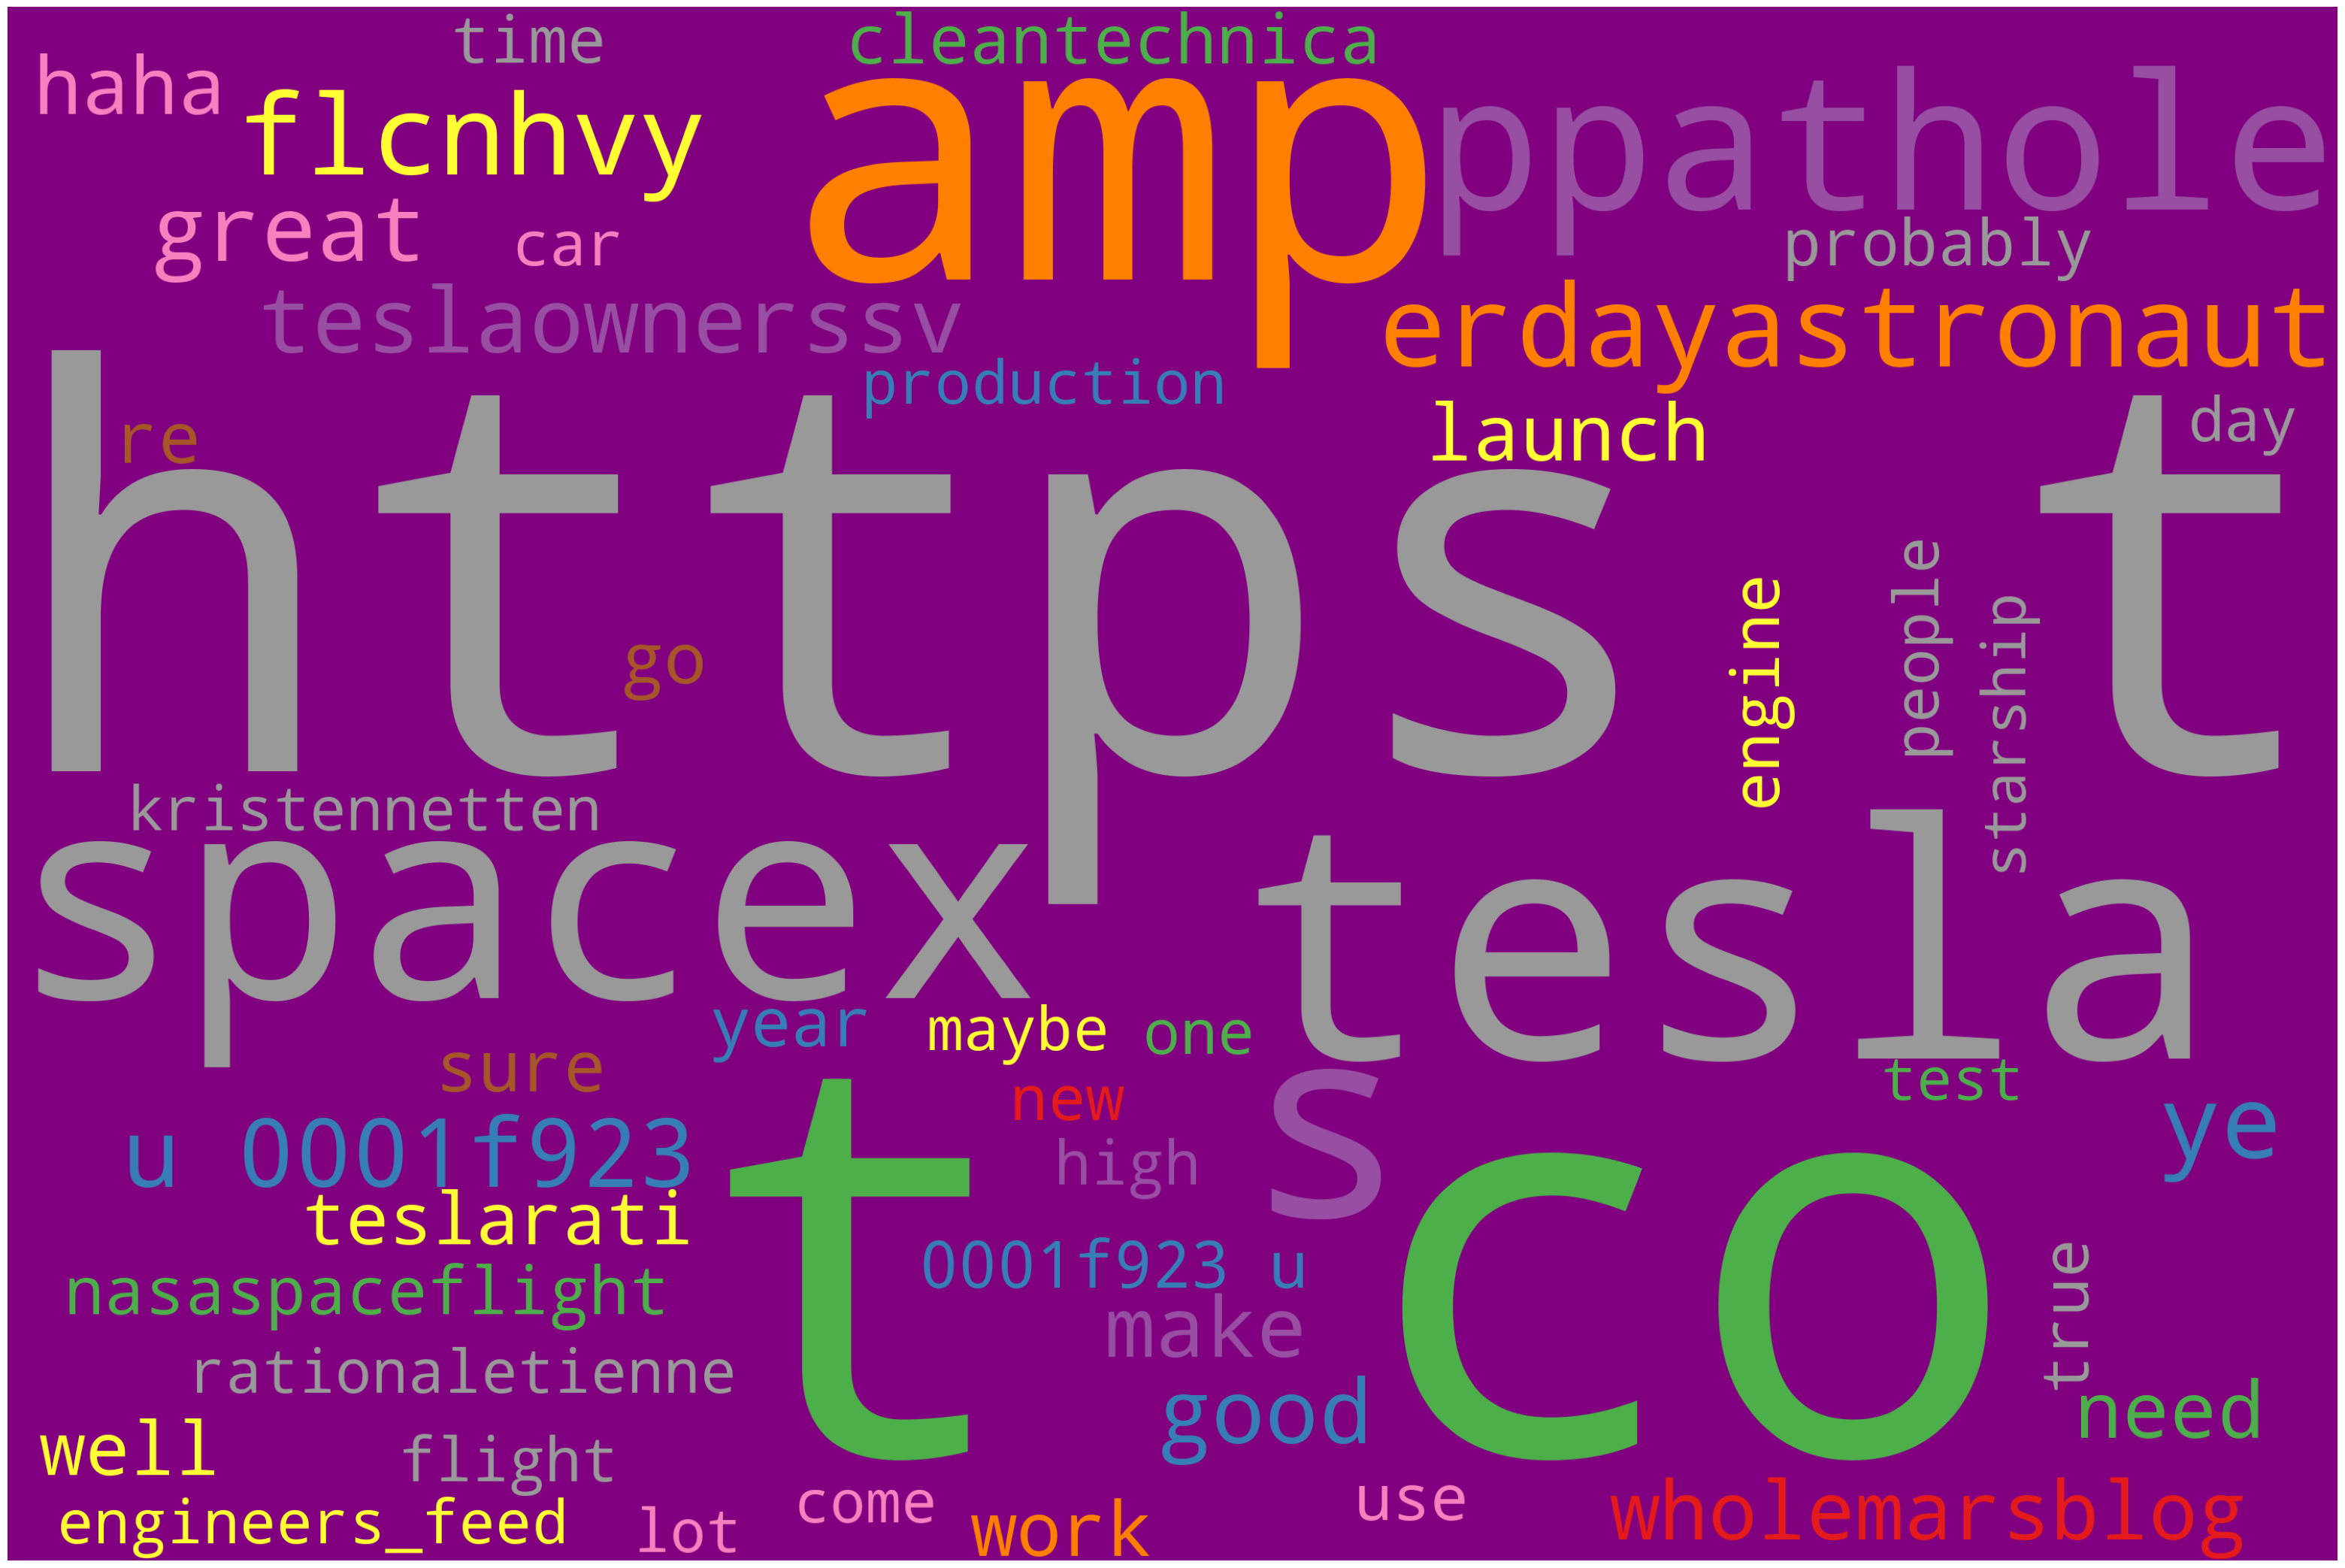

In [46]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
from wordcloud import WordCloud, STOPWORDS

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='purple',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_df)
plot_cloud(wordcloud)